**Table of contents**<a id='toc0_'></a>    
- [**Histograms**](#toc1_)    
- [**Kernel Density Estimation (KDE) Plots**](#toc2_)    
    - [**`Caution`**](#toc2_1_1_1_)    
- [**ECDF (Empirical Cumilitive Distribution Function) Plot**](#toc3_)    
- [**Strip Plot, Swarm Plot, Box Plot, Boxen Plot and Violin Plot**](#toc4_)    
    - [The `kind` parameter](#toc4_1_1_1_)    
  - [**Box and Whisker Plots**](#toc4_2_)    
  - [**Boxen Plot**](#toc4_3_)    
  - [**Violin Plot**](#toc4_4_)    
  - [**A Quick Example of Strip Plot and Swarm Plot**](#toc4_5_)    
    - [Caution](#toc4_5_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing Distributions of Data ([Docs](https://seaborn.pydata.org/tutorial/distributions.html))

*In statistics and probability theory, a distribution refers to the way the values in a dataset are spread or distributed over the entire range of possible values.*

Before delving into data analysis or modeling, it's crucial to get a clear picture of how the different variables in your dataset are spread out. Visualizing these distributions can swiftly answer important questions such as: 

- What's the span of values covered by the data?
- What's the central tendency? i.e, where do most of the data points tend to cluster?
- Is the data heavily skewed to one direction?
- Is there any evidence for bimodality?
- Are there significant outliers? etc.

Distribution plots are used for showing possible values or intervals/bins of the data, usually in the x axis and how often they occur, usually along the y axis. 

These types of charts can reveal the minimum and maximum values, median, outliers, frequency, and probability densities.

- <i> **Questions:**
1. What are the highest, middle, and lowest values?
2. Does one thing stand out from the rest?
3. What does the shape of the data look like?

- **Insight:** use distributions charts to reveal outliers, the shape of the distribution (verify if the data really represents a known distribution), frequencies, range of values, minimum value, maximum value, and the median.

- **Data:** univariate or a single numeric variable (type of data that involves observations or measurements on a single characteristic or variable).

- **Chart options:** histogram, density plot, and a boxplot. </i>

> The `seaborn.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind={“hist”, “kde”, “ecdf”}, rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)` function provides a unified interface to generate different types of distribution plots. This is very useful to quickly switch between different visual representations of the data and see what works best when doing exploratory data analysis. Also similar to other unified seaborn plotting functions it takes in 'row' and 'col' arguments and provides a convenient way to generate separate plots for different subsets of the data. 
>
>> See the detailed documentation @https://seaborn.pydata.org/generated/seaborn.displot.html

## <a id='toc1_'></a>[**Histograms**](#toc0_)

Histograms show frequencies of a single variable grouped into bins or frequency ranges on the x-axis. The y-axis of the histogram shows the frequency count or percentage.

**Notes:**
- A large bin size can obscure the data.
- Adjust the size of the bins to best reveal the shape of the frequency distribution. 

    The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution.
- Histograms can be drawn for both discrete and continuous data. But, for continuous data KDE or ECDF plots are preferred.

> The `seaborn.histplot(data=None, x=None, y=None, hue=None, multiple='layer', stat='count', element='bars', bins='auto', fill=True, kde=False, palette=None, color=None, legend=True, ax=None, **kwargs)` function is used for binnning the observations, count them and visualizing the histogram. It can also be used optionally to normalize or cumulate the observations when plotting. 
> 
> >See the documentation at, https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot for more details.

<u>Function Parameters</u>

- `data:` Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.
- `x, y:` Vectors or keys in data. Variables that specify positions on the x and y axes. For univariate data, only specify x to have the bins in the x axis and only specify y to have a horizontal histogram (if that makes any sense). If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column. To plot multivariate data specify both x and y.
- `hue:` Vector or key in data. Semantic variable that is mapped to determine the color of plot elements.
- `multiple{“layer”, “dodge”, “stack”, “fill”}:` Approach to resolving multiple elements when semantic mapping creates subsets.  Only relevant with univariate data.
- `stat:` Aggregate statistic to compute in each bin.
    - count: show the number of observations in each bin (default).
    - frequency: show the number of observations divided by the bin width.
    - probability or proportion: normalize such that bar heights sum to 1.
    - percent: normalize such that bar heights sum to 100.
    - density: normalize such that the total area of the histogram equals 1.
- `element{“bars”, “step”, “poly”}:` Visual representation of the histogram statistic.  Only relevant with univariate data.
- `bins:` Can be a str, number (the number of bins), vector (the breaks of the bins), or a pair of such values.
- `kde:` If True, compute a kernel density estimate to smooth the distribution and show on the plot as one or more line(s).
- `kde_kws:` Parameters passed to sns.kdeplot().

In [3]:
data = sns.load_dataset("penguins")

In [4]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

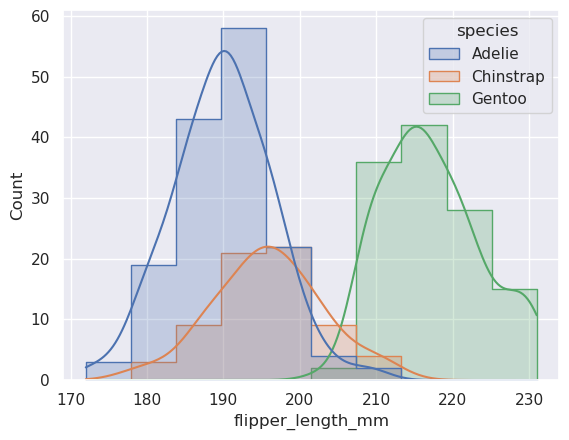

In [5]:
sns.histplot(data, x="flipper_length_mm", hue="species", element="step", kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

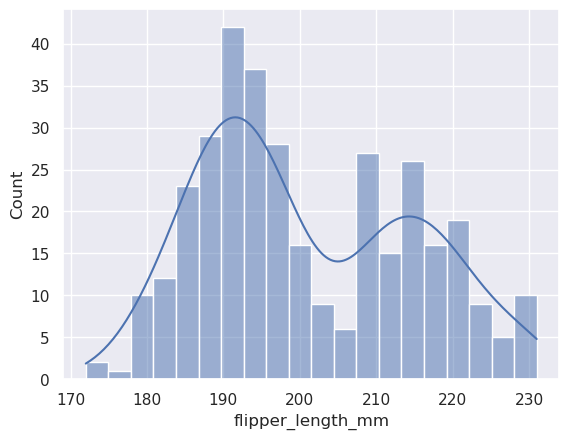

In [6]:
sns.histplot(data, x="flipper_length_mm", kde=True, bins=20)

## <a id='toc2_'></a>[**Kernel Density Estimation (KDE) Plots**](#toc0_)

<u>**Resources**</u>
- Density curves and their properties (https://www.youtube.com/watch?v=Txlm4ORI4Gs&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=18)
- Wikipedia article on KDE (https://en.wikipedia.org/wiki/Kernel_density_estimation)
- How KDE is calculated (https://www.youtube.com/watch?v=_maAYlx68_o)

**`Discrete random variable:`** A discrete random variable is a random variable that can only take on a finite or countable number of distinct values. These values are often represented by integers or whole numbers. For example, the number of children in a family can take on the values 0, 1, 2, 3, 4, and so on. It can never be 2.5 children.

Discrete random variables are often used to model real-world phenomena, such as the number of children in a family, the number of defective products in a production line, or the number of cars that pass through an intersection in a certain amount of time.

**`Continuous random variable:`** The set of possible values for a continuous random variable is an interval of real numbers and a continuous random variable can take on any value in that particular range. 

In other words, a continuous random variable represents a quantity that can take on an infinite number of possible values within a specified range. 

Unlike discrete random variables, which can only take on a countable number of distinct values, continuous random variables can assume any value within their defined range. Continuous random variables are usually measurements, such as height, weight, the amount of sugar in an orange, or the time required to run a mile. 

The probability that a continuous random variable will take on a particular value is zero. This is because there are an infinite number of possible values, and the probability of any one value occurring is infinitesimally small.

**`Density Curve:`** A density curve is a graphical representation of the probability distribution of a continuous random variable. It is similar to a histogram, but instead of using bars to represent the frequencies of different values, it uses a smooth curve. It shows how the probability is spread out across the continuous range of possible values. The area under the density curve within a specific interval represents the probability of the random variable falling within that interval.

**Note:** *Use density plots to show the distribution of a single variable (along with probability densities). Annotate the mean to draw attention to the center of the distribution.*

`->` When to use

Kernel Density Estimation (KDE) plots are useful for visualizing the probability density of a continuous dataset. Here's when to use them, when to avoid them, and some best practices:

- To get a sense of the underlying distribution of your data, especially when dealing with continuous variables. KDE can provide insights into the shape, central tendency, and spread of the data.
- For comparing multiple data distributions. You can overlay multiple KDE plots on the same graph to assess differences or similarities between datasets.
- For identifying modes (peaks) in the data. Bimodal or multimodal distributions, where data has multiple peaks, are often more apparent in KDE plots than in histograms.
- When you want to visualize the data while minimizing the impact of random noise or variations, KDE plots can be helpful since they provide a smoothed representation of the distribution.

`->` When to avoid

- With very small sample sizes, KDE plots may not provide meaningful insights and can be sensitive to the choice of kernel and bandwidth (since the sample can't be splited infinitely to replicate the KDE shape). In such cases, other methods like histograms or box plots might be more appropriate.
- KDE is designed for continuous data. For discrete data, histograms or bar plots may be more suitable for visualizing the data distribution.
- If your audience is not familiar with KDE plots or probability density functions, simpler visualizations like histograms or box plots may be easier for them to understand.

`->` Best practices

- Optimize the bandwidth parameter (it determines the level of smoothing in the KDE plot). A smaller bandwidth results in a more detailed but potentially noisy plot, while a larger bandwidth oversmooths the data. 

> `To draw` a KDE plot in seaborn, we will use the `seaborn.kdeplot(data=None, x=None, y=None, hue=None, palette=None, color=None, fill=None, multiple='layer', bw_method='scott', bw_adjust=1, cut=3, clip=None, legend=True, ax=None, **kwargs)` function. 
> 
> >The detailed documentation can be found at, https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

<u>Function Parameters</u>

- `data:` Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.
- `x, y:` Vectors or keys in data. Variables that specify positions on the x and y axes. For univariate data, only specify x to have the DE above the x axis (a density plot must be above the x axis and not y axis). If neither x nor y is assigned, the dataset is treated as wide-form, and a KDE line is drawn for each numeric column. To plot multivariate data specify both x and y.
- `hue:` Vector or key in data. Semantic variable that is mapped to determine the color of plot elements.
- `multiple{“layer”, “stack”, “fill”}:` Approach to resolving multiple elements when semantic mapping creates subsets.  Only relevant with univariate data.
- `bw_method:` Method for determining the smoothing bandwidth to use.
- `bw_adjust:` Factor that multiplicatively scales the value chosen using bw_method. Increasing will make the curve smoother.
- `cut=3:` Factor, multiplied by the smoothing bandwidth, that determines how far the evaluation grid extends past the extreme datapoints. When set to 0, truncate the curve at the data limits (this will result in the plot having a totla area < 1).
- `clip:` Pair of numbers. Do not evaluate the density outside of these limits.

**`Notes:`**
1. The bandwidth, or standard deviation of the smoothing kernel, is an important parameter. Misspecification of the bandwidth can produce a distorted representation of the data. Much like the choice of bin width in a histogram, an over-smoothed curve can erase true features of a distribution, while an under-smoothed curve can create false features out of random variability. The rule-of-thumb that sets the default bandwidth works best when the true distribution is smooth, unimodal, and roughly bell-shaped. It is always a good idea to check the default behavior by using bw_adjust to increase or decrease the amount of smoothing.

2. Because the smoothing algorithm uses a Gaussian kernel, the estimated density curve can extend to values that do not make sense for a particular dataset. For example, the curve may be drawn over negative values when smoothing data that are naturally positive. The cut and clip parameters can be used to control the extent of the curve, but datasets that have many observations close to a natural boundary may be better served by a different visualization method.

3. Similar considerations apply when a dataset is naturally discrete or “spiky” (containing many repeated observations of the same value). Kernel density estimation will always produce a smooth curve, which would be misleading in these situations.

4. The units on the density axis are a common source of confusion. While kernel density estimation produces a probability distribution, the height of the curve at each point gives a density, not a probability. A probability can be obtained only by integrating the density across a range. The curve is normalized so that the integral over all possible values is 1, meaning that the scale of the density axis depends on the data values.

In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


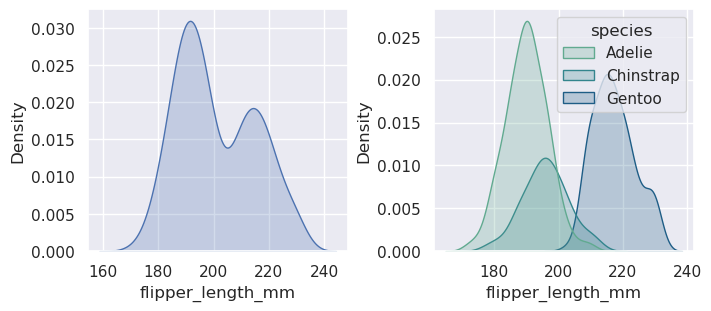

In [8]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")

sns.kdeplot(x=data.flipper_length_mm, fill=True, ax=ax0)
sns.kdeplot(
    x=data.flipper_length_mm, hue=data.species, fill=True, palette="crest", ax=ax1
)

plt.show()

##### <a id='toc2_1_1_1_'></a>[**`Caution`**](#toc0_)

The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

In [9]:
diamonds = sns.load_dataset("diamonds")

<Axes: xlabel='carat', ylabel='Count'>

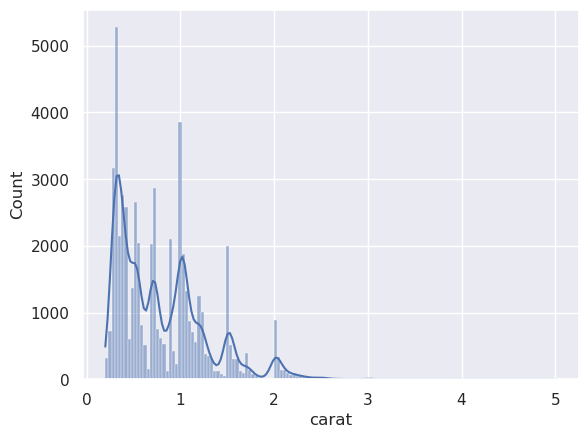

In [10]:
sns.histplot(diamonds, x="carat", kde=True)

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution.

## <a id='toc3_'></a>[**ECDF (Empirical Cumilitive Distribution Function) Plot**](#toc0_)

*An ECDF represents the proportion or count of observations falling below each unique value in a dataset.* 

Compared to a histogram or density plot, it has the advantage that each observation is visualized directly, meaning that there are no binning or smoothing parameters that need to be adjusted. It also aids direct comparisons between multiple distributions. 

> To draw an ECDF plot we can use the, `seaborn.ecdfplot(data=None, *, x=None, y=None, hue=None, stat='proportion', complementary=False, palette=None, legend=True, ax=None, **kwargs)` function. 
> 
> >The detailed documentation is available at, https://seaborn.pydata.org/generated/seaborn.ecdfplot.html.

<u> Function Parameters </u>

- `data:` Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.
- `x, y:` Vectors or keys in data. Variables that specify positions on the x and y axes. If neither x nor y is assigned, the dataset is treated as wide-form, and a ECDF line is drawn for each numeric column. To plot multivariate data specify both x and y.
- `hue:` Vector or key in data. Semantic variable that is mapped to determine the color of plot elements.
- `stat {“proportion”, “count”}:` Distribution statistic to compute.
- `complementary:` If True, use the complementary CDF i.e, (1 - CDF).

In [11]:
data.groupby("species").flipper_length_mm.agg(["min", "max"])

,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

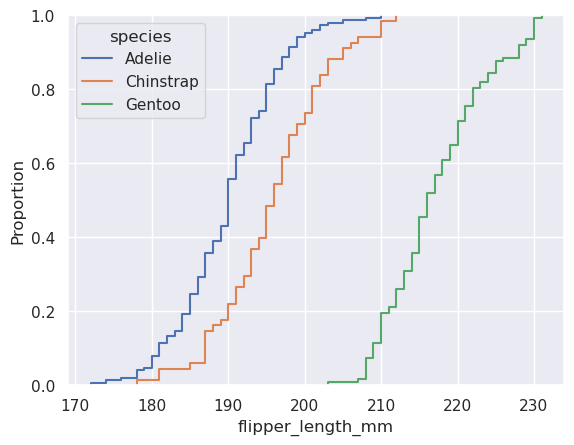

In [12]:
sns.ecdfplot(x=data.flipper_length_mm, hue=data.species)

The major downside to the ECDF plot is that it represents the shape of the distribution less intuitively than a histogram or density curve. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes.

## <a id='toc4_'></a>[**Strip Plot, Swarm Plot, Box Plot, Boxen Plot and Violin Plot**](#toc0_)

> The `seaborn.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind={“bar”, “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “count”}, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)` function provides a unified interface to generate different types of categorical plots. We can also use this function to visualize different properties of the distribution of different categorical variables (with *kind={“strip”, “swarm”, “box”, “violin”, “boxen”}*). 
> 
>> This is very useful to quickly switch between different visual representations of the data and see what works best. Also similar to other unified seaborn plotting functions it takes in 'row' and 'col' arguments and provides a convenient way to generate separate plots for different subsets of the data. 
>
>> The detailed documentation can be found at, https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot.
>
>> See the tutorial at, https://seaborn.pydata.org/tutorial/categorical.html.
>
>> **`Note:`** We can also use the low level plotting functions such as, `sns.stripplot(), sns.swarmplot(), sns.boxplot(), sns.violinplot(), sns.boxenplot()` to generate the plots individually.

##### <a id='toc4_1_1_1_'></a>[The `kind` parameter](#toc0_)

The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”. 
    
  - `kind="strip":` All of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. To adjust the positions of points on the categorical axis with a small amount of random “jitter” use, *jitter=True*. Kind of like bar plot but all of the points in a category is plotted.

  - `kind="swarm":` This is the same as a *stripplot* but uses an algorithm that prevents the plotted points from overlapping. This doesn't scale well for large datasets.

  - `kind="box":` Used for plotting a boxplot that shows five summary statistics (the median, two hinges and two whiskers) of a dataset. It can also show outliers.

  - `kind="boxen":` Draws a plot that is similar to a box plot but it is optimized for showing more information about the shape of the distribution. It is best suited for larger datasets.

  - `kind="violin":` A different approach for examining the distribution characteristics (summary statistics and the distribution shape) is to use a violin plot. This combines a boxplot with the KDE (kernel density estimate) plot. This provides a more visual description about the distribution of the data, but it is resource intensive. It is best suited for smaller datasets.


### <a id='toc4_2_'></a>[**Box and Whisker Plots**](#toc0_)

*A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.*

The box shows the quartiles (Q1/25th percentile, Q2/50th percentile i.e, the median and Q3/75th percentile) of the dataset while the whiskers extend to show the rest of the distribution (i.e, min to Q1 and Q3 to max values), except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

- IQR = Q3 - Q1
- min = Q1 - (1.5 * IQR)
- max = Q3 + (1.5 * IQR)

> To draw a box-and-whisker plot we can use the, `seaborn.boxplot(data=None, *, x=None, y=None, hue=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)` function.

<u> Function Parameters </u>

- `data:` Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.
- `x, y, hue:` names of variables in data or vector data Inputs for plotting long-form data.

- `orient:` Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both x and y are numeric or when plotting wide-form data.
- `dodge:` When hue nesting is used, whether elements should be shifted along the categorical axis (bool).
- `fliersize:` Size of the markers used to indicate outlier observations.
- `whis:` Maximum length of the plot whiskers as proportion of the interquartile range. Whiskers extend to the furthest datapoint within that range. More extreme points are marked as outliers.

In [13]:
data.groupby("species").flipper_length_mm.agg("describe")

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,189.953642,6.539457,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,123.0,217.186992,6.484976,203.0,212.0,216.0,221.0,231.0


<Axes: xlabel='flipper_length_mm', ylabel='species'>

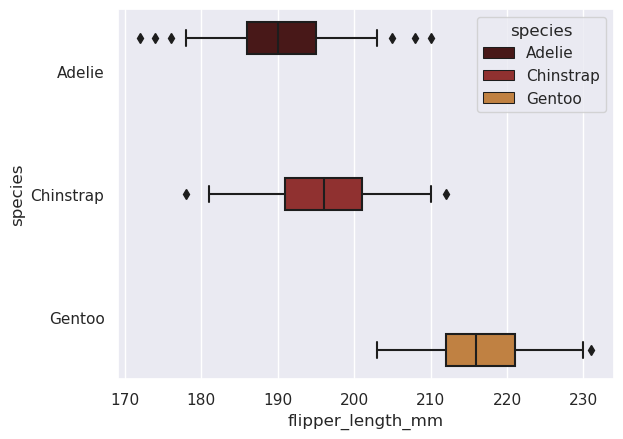

In [14]:
sns.boxplot(
    x=data.flipper_length_mm,
    y=data.species,
    hue=data.species,
    palette="gist_heat",
    saturation=0.5,
    whis=1,
)

### <a id='toc4_3_'></a>[**Boxen Plot**](#toc0_)

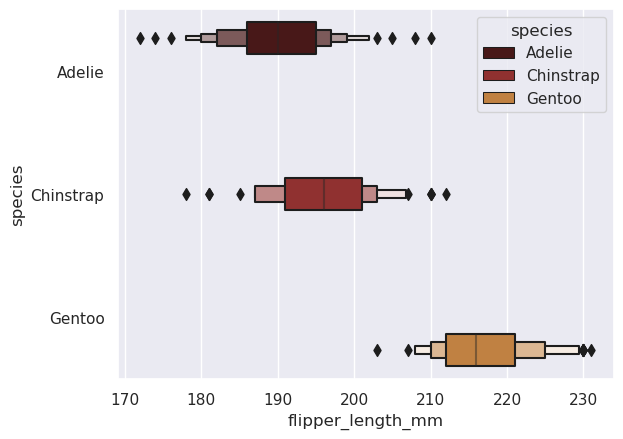

In [15]:
sns.boxenplot(
    x=data.flipper_length_mm,
    y=data.species,
    hue=data.species,
    palette="gist_heat",
    saturation=0.5
)
plt.show()

### <a id='toc4_4_'></a>[**Violin Plot**](#toc0_)

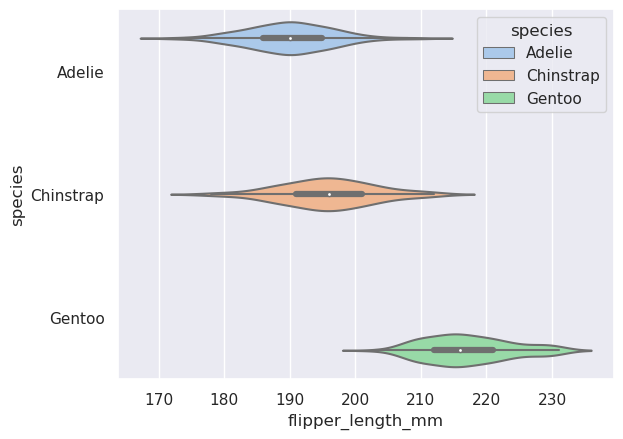

In [16]:
g = sns.violinplot(
    x=data.flipper_length_mm,
    y=data.species,
    hue=data.species,
    palette="pastel",
    inner="box"
)

### <a id='toc4_5_'></a>[**A Quick Example of Strip Plot and Swarm Plot**](#toc0_)

This may come in handy when we want to compare the distribution of a numeric variable across the categories of a categorical variable and also see how the data is clustered around certain values for each category.

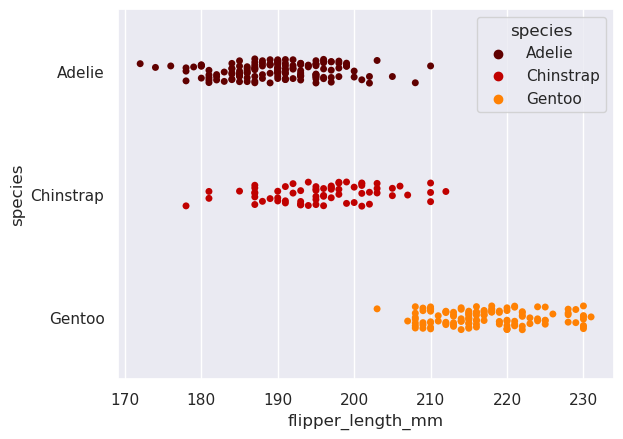

In [17]:
sns.stripplot(
    x=data.flipper_length_mm,
    y=data.species,
    hue=data.species,
    palette="gist_heat",
)
plt.show()

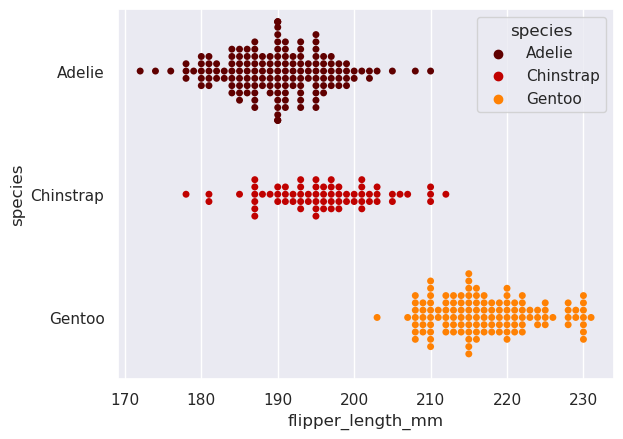

In [18]:
sns.swarmplot(
    x=data.flipper_length_mm,
    y=data.species,
    hue=data.species,
    palette="gist_heat"
)
plt.show()

##### <a id='toc4_5_1_1_'></a>[Caution](#toc0_)

The Strip plot and Swarm plot shows all the data points in a "category vs. numeric variable" scatterplot. 
- These plots doesn't scale well for large amounts of data. So be carefull.
- These should only be used to get a feel about the data visually.
- These may be used only to see how the data is clustered or for primary investigation but never to see how the data is distributed we should use "histograms" and "kde plots".